# Multivariate Linear Regression Optimization

Used for plugging in synthetic optimization dataset to find the optimal value for parameters

In [78]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

### Function Definitions

Returns the Linear Regression Equation for the model in a readable format

In [79]:
def getEq(weights, cols, intercept):
    return ('Formula: y =  {} + {}({}) + {}({}) + {}({}) + {}({})'.format(intercept, weights[0], cols[0], weights[1], cols[1], weights[2], cols[2], weights[3], cols[3]))

#### Cleaning Data

In [80]:
cols =['Temp','Speed','Distance','Pressure']
collectedDataset = pd.read_csv('../DataSets/deviceSummary.csv')
X = collectedDataset.iloc[:, 1:-1].values
y = collectedDataset.iloc[:, -1].values

#generatedDataset = pd.read_csv('../DataSets/optimizedSyntheticDataset.csv') #100,000 data samples
generatedDataset = pd.read_csv('../DataSets/machineAcceptingOptimizedSynthetic.csv') #4000 data samples
genData = generatedDataset.iloc[:, 1:-1].values #Remove Trial Number and Efficiency Score

4


,Trial,Temperature,Speed,Distance,Pressure,Efficiency
0,0,50.0,125.0,5.0,0.0,0.0
1,1,50.0,125.0,5.0,1.0,0.0
2,2,50.0,125.0,5.0,2.0,0.0
3,3,50.0,125.0,5.0,3.0,0.0
4,4,50.0,125.0,5.0,4.0,0.0
...,...,...,...,...,...,...
4923,4923,80.0,200.0,8.0,6.0,0.0
4924,4924,80.0,200.0,8.0,7.0,0.0
4925,4925,80.0,200.0,8.0,8.0,0.0
4926,4926,80.0,200.0,8.0,9.0,0.0


array([[ 50., 125.,   5.,   0.],
       [ 50., 125.,   5.,   1.],
       [ 50., 125.,   5.,   2.],
       ...,
       [ 80., 200.,   8.,   8.],
       [ 80., 200.,   8.,   9.],
       [ 80., 200.,   8.,  10.]])

#### Spliting Classes

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print("Test Size: " + str(len(X_test)))
print("Train Size: " + str(len(X_train)))

Test Size: 16
Train Size: 90


#### Calculating Regressions

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
optimal = regressor.predict(genData)
print(cols[3])
print(getEq(regressor.coef_, cols, regressor.intercept_))

[[ 70 150   7   0]
 [ 50 150   7   7]
 [ 50 150   7  10]
 [ 50 150   7   3]
 [ 70 150   8   0]
 [ 70 125   7   0]
 [ 70 200   7   0]
 [ 70 150   5   0]
 [ 70 300   7   0]
 [ 70 100   7   0]
 [ 90 150   7   0]
 [ 50 150   7   3]
 [ 70 300   7   0]
 [ 70 125   7   0]
 [ 50 150   7   7]
 [ 70 150   5   0]
 [ 50 150   7   7]
 [ 70 150   5   0]
 [ 50 150   7  10]
 [ 60 150   7   0]
 [ 70 200   7   0]
 [ 70 150   7   0]
 [ 80 150   7   0]
 [ 50 150   7   3]
 [ 80 150   7   0]
 [ 50 150   7   7]
 [ 50 150   7   0]
 [ 70 100   7   0]
 [ 50 150   7   7]
 [ 50 150   7   0]
 [ 50 150   7   0]
 [ 70 100   7   0]
 [ 70 150   7   0]
 [ 70 150   7   0]
 [ 50 150   7   0]
 [ 50 150   7   0]
 [ 70 100   7   0]
 [ 50 150   7   3]
 [ 70 150   6   0]
 [ 60 150   7   0]
 [ 70 100   7   0]
 [ 50 150   7   0]
 [ 70 200   7   0]
 [ 60 150   7   0]
 [ 50 150   7   3]
 [ 70 150   7   0]
 [ 80 150   7   0]
 [ 50 150   7   0]
 [ 70 200   7   0]
 [ 70 300   7   0]
 [ 70 150   5   0]
 [ 60 150   7   0]
 [ 50 150   

In [83]:
effToParam = {}
for i in range(len(optimal)):
    effToParam[optimal[i]] = genData[i]

### Sorting
Sorts and Returns Params for Highest Efficiency Combinations

In [84]:
optimal.sort()
optimal = np.flip(optimal)
numParams = 50
print("Printing Top {} Combinations of Paramaters".format(numParams))
print("Order is as follows:")
print("Efficiency,\t\t Temp, Speed, Distance Pressure")
print('-'*35)
for i in range(numParams):
    print(optimal[i], '\t',  str(effToParam[optimal[i]]))

Printing Top 50 Combinations of Paramaters
Order is as follows:
Efficiency,		 Temp, Speed, Distance Pressure
-----------------------------------
6.9892977405306524 	 [ 50. 125.   5.  10.]
6.96061773966607 	 [ 50. 125.   5.   9.]
6.946763929172121 	 [ 50. 130.   5.  10.]
6.931937738801487 	 [ 50. 125.   5.   8.]
6.918083928307539 	 [ 50. 130.   5.   9.]
6.90423011781359 	 [ 50. 135.   5.  10.]
6.9032577379369044 	 [ 50. 125.   5.   7.]
6.889403927442956 	 [ 50. 130.   5.   8.]
6.877347399569464 	 [ 50. 125.   6.  10.]
6.875550116949007 	 [ 50. 135.   5.   9.]
6.874577737072322 	 [ 50. 125.   5.   6.]
6.861696306455059 	 [ 50. 140.   5.  10.]
6.860723926578373 	 [ 50. 130.   5.   7.]
6.848667398704881 	 [ 50. 125.   6.   9.]
6.846870116084425 	 [ 50. 135.   5.   8.]
6.845897736207739 	 [ 50. 125.   5.   5.]
6.834813588210933 	 [ 50. 130.   6.  10.]
6.833016305590476 	 [ 50. 140.   5.   9.]
6.832043925713791 	 [ 50. 130.   5.   6.]
6.819987397840299 	 [ 50. 125.   6.   8.]
6.8191624950965

#### Calculating Statistical Values

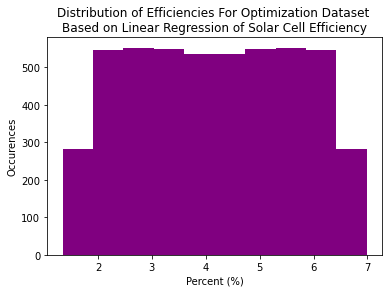

In [85]:
plt.hist(optimal, color='purple')
plt.title('Distribution of Efficiencies For Optimization Dataset \nBased on Linear Regression of Solar Cell Efficiency')
plt.xlabel('Percent (%)')
plt.ylabel('Occurences')
print('')

#### Graphing Results